In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
# add the path of the virtual environmentsite-packages to colab system path
sys.path.append("/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages")

In [ ]:
!source /content/drive/MyDrive/virtual_env/bin/activate; pip install adjust_text

/bin/bash: /content/drive/MyDrive/virtual_env/bin/pip: /content/drive/MyDrive/virtual_env/bin/python: bad interpreter: Permission denied


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
from glob import iglob

In [ ]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.25.2 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.1 igraph==0.10.8 pynndescent==0.5.11


In [ ]:
# the directory with the `.h5` file
# use gene symbols for the variable names (variables-axis index)
output_data_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat"
output_fig_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat/Figs"
input_dir="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat"
sc.settings.figdir = output_fig_dir

In [ ]:
#read in inh cells
sub_adata = sc.read(os.path.join(input_dir,"inh_class.h5ad"))
print(sub_adata)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 11512 × 1997
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'leiden', 'class'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [ ]:
sub_smplist = sub_adata.obs_names.tolist()
print(sub_smplist[:3])

['NW_TX0048-2_AAACGCTAGAGCAGCT-1', 'NW_TX0048-2_AAACGCTAGGAAGAAC-1', 'NW_TX0048-2_AAAGGATAGCGCTTCG-1']


In [ ]:
raw_adata = sc.read(os.path.join(input_dir,"rat_all_raw_filt.h5ad"))
print(raw_adata)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 73123 × 19995
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'


In [ ]:
adata = raw_adata[raw_adata.obs_names.isin(sub_smplist),:]
print(adata)

View of AnnData object with n_obs × n_vars = 11512 × 19995
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'


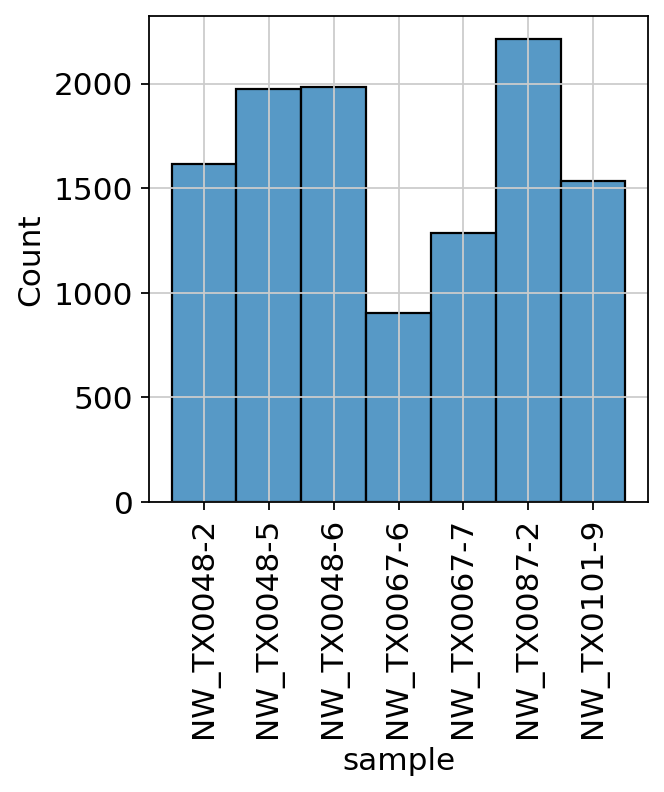

In [ ]:
#print(sub_adata.obs['sample'].value_counts())
#fig, axs = plt.subplots(1,1,figsize=(5,10))
plot = sns.histplot(adata.obs["sample"], kde=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"inh_sample_dist.png"),bbox_inches="tight")

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


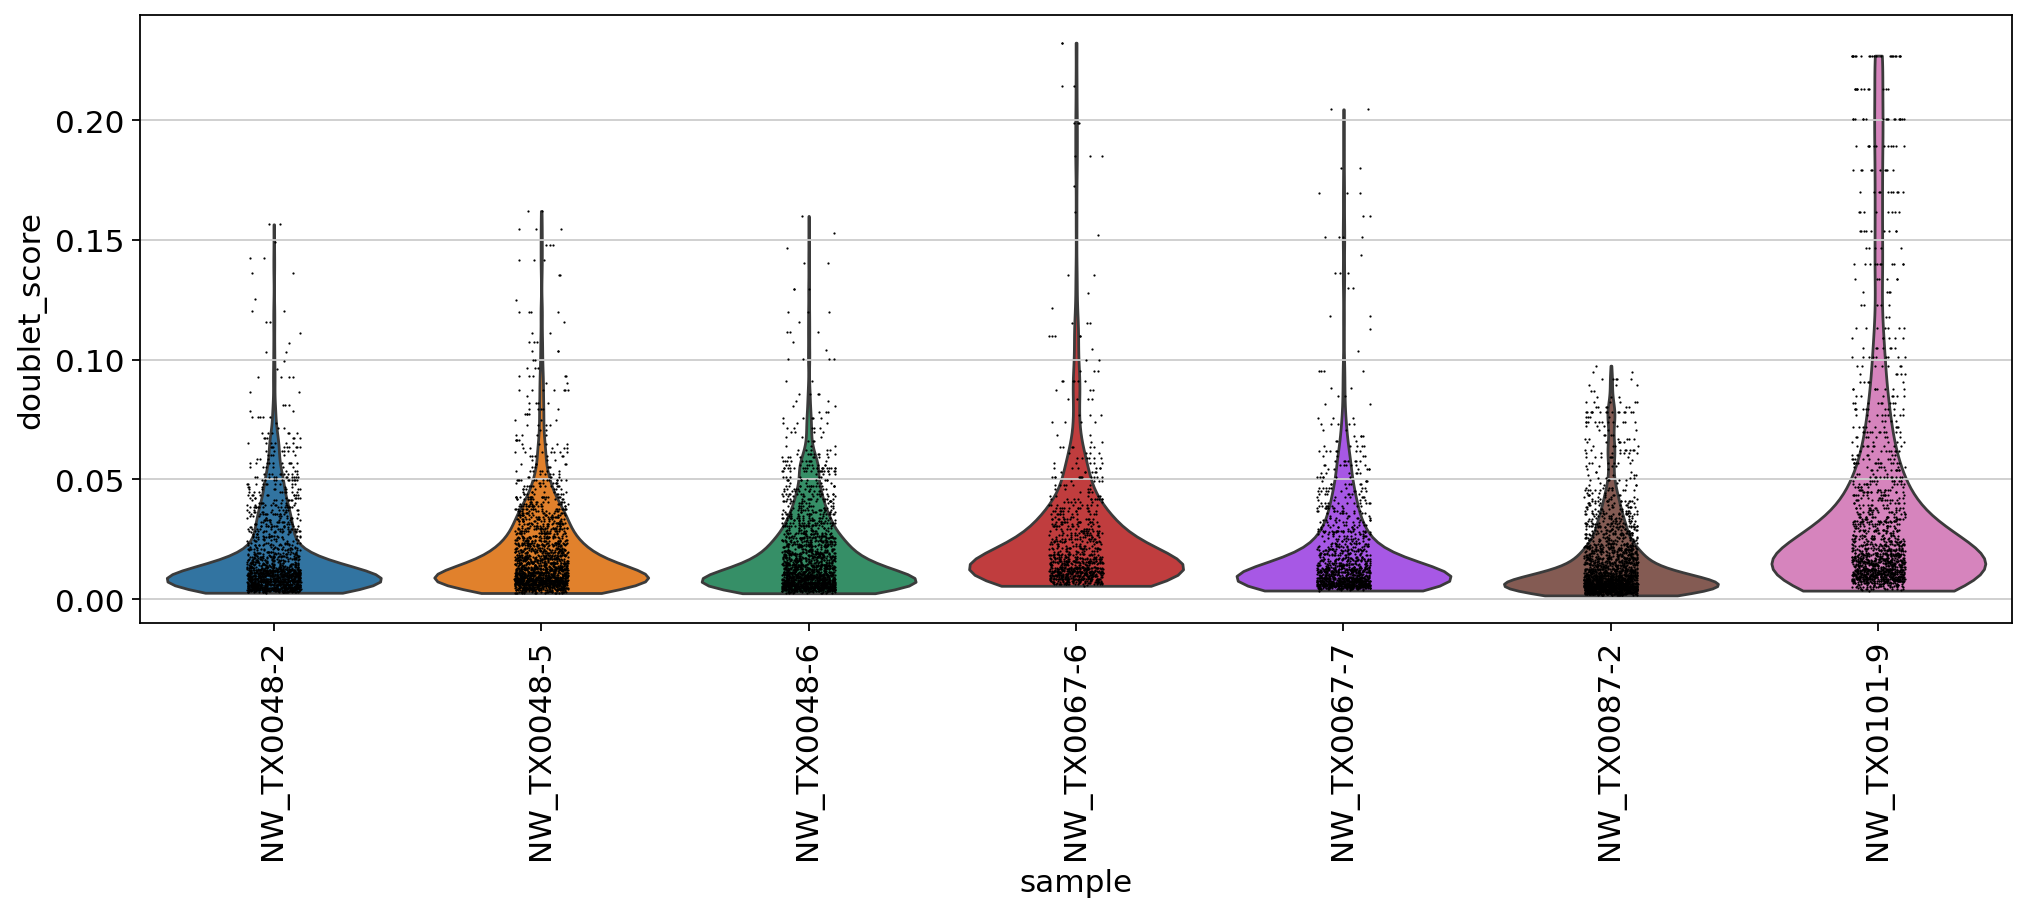

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="doublet_score", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"inh_doublet_score.png"),bbox_inches="tight")

In [ ]:
# calculate percent ribosomal genes
ribo_genes = adata.var_names.str.startswith(("Rps","Rpl"))
print(sum(ribo_genes))
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
## the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
#adata.obs['percent_ribo'] = np.sum(
#    adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
print(adata.var_names[ribo_genes])

151
Index(['Rps12l2', 'Rps19', 'Rps3', 'Rplp2', 'Rpl18', 'Rps5', 'Rps16', 'Rps13',
       'Rps6ka4', 'Rps6ka2',
       ...
       'Rps27a-ps6', 'Rpl37a-ps5', 'Rpl9-ps20', 'Rpl10a', 'Rps10l1', 'Rpl6',
       'Rpl21-1', 'Rplp0', 'Rpl31l4', 'Rpl35a-ps6'],
      dtype='object', length=151)


False    19982
True        13
Name: mt, dtype: int64


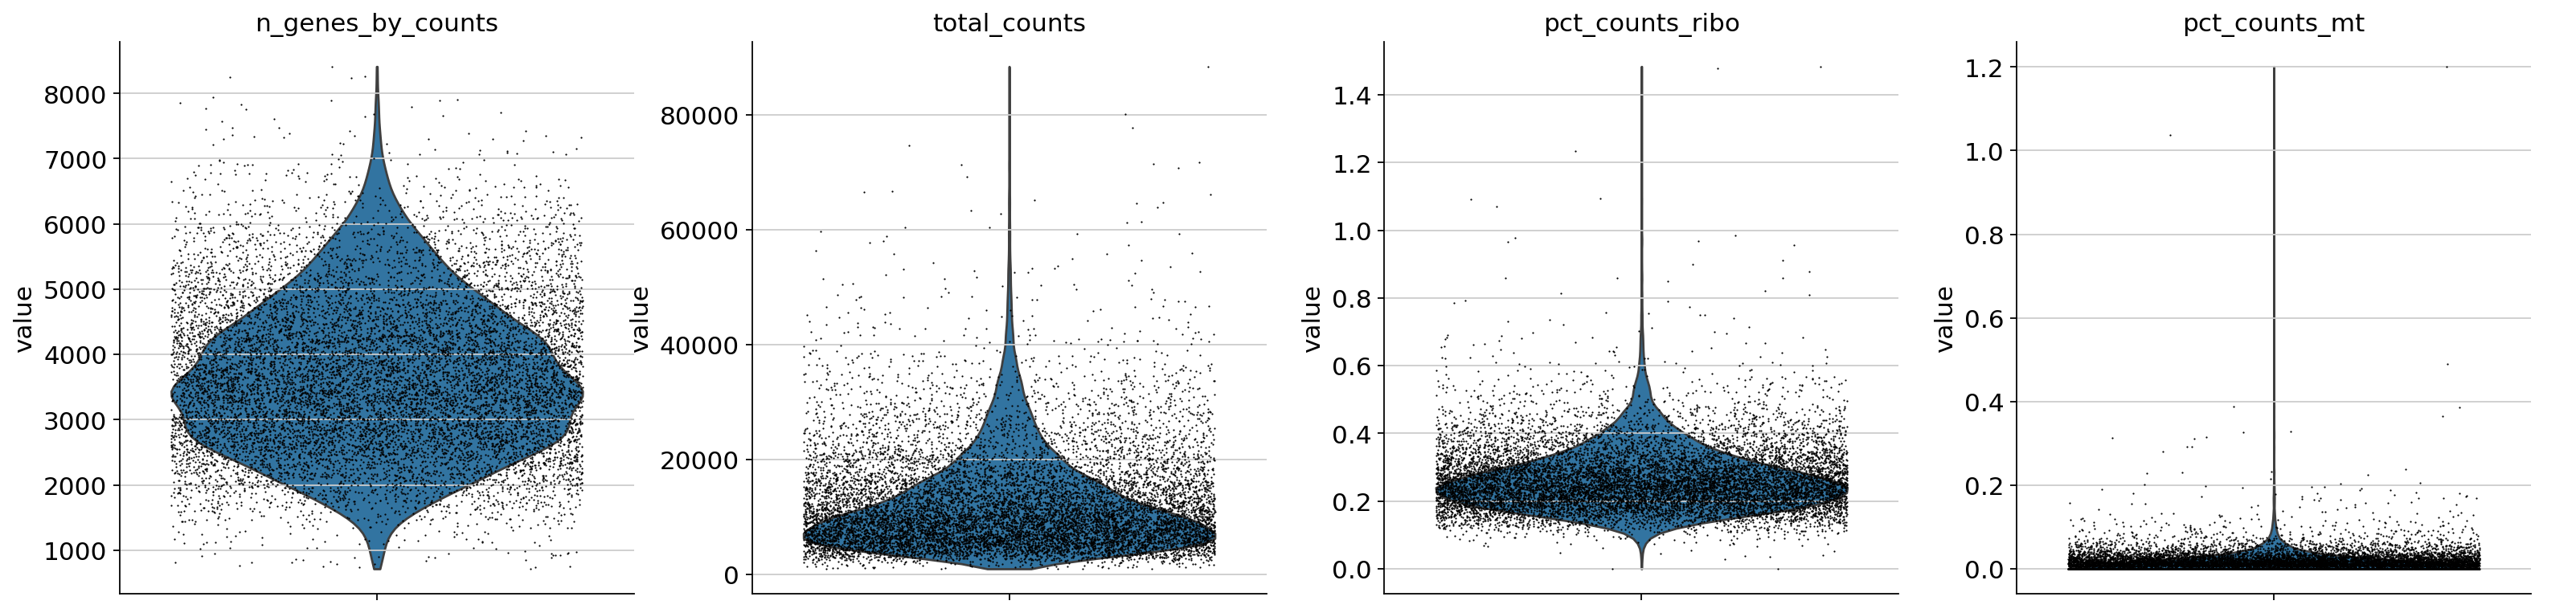

In [ ]:
# annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)
print(adata.var['mt'].value_counts())
adata.obs['pct_counts_mt'] = raw_adata[raw_adata.obs_names.isin(sub_smplist),:].obs['pct_counts_mt']
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo','pct_counts_mt'],jitter=0.4, multi_panel=True, show=False)
plt.savefig(os.path.join(output_fig_dir,"inh_mt_ribo_qc.png"))
#plt.show()

In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 11512 × 19995
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors'


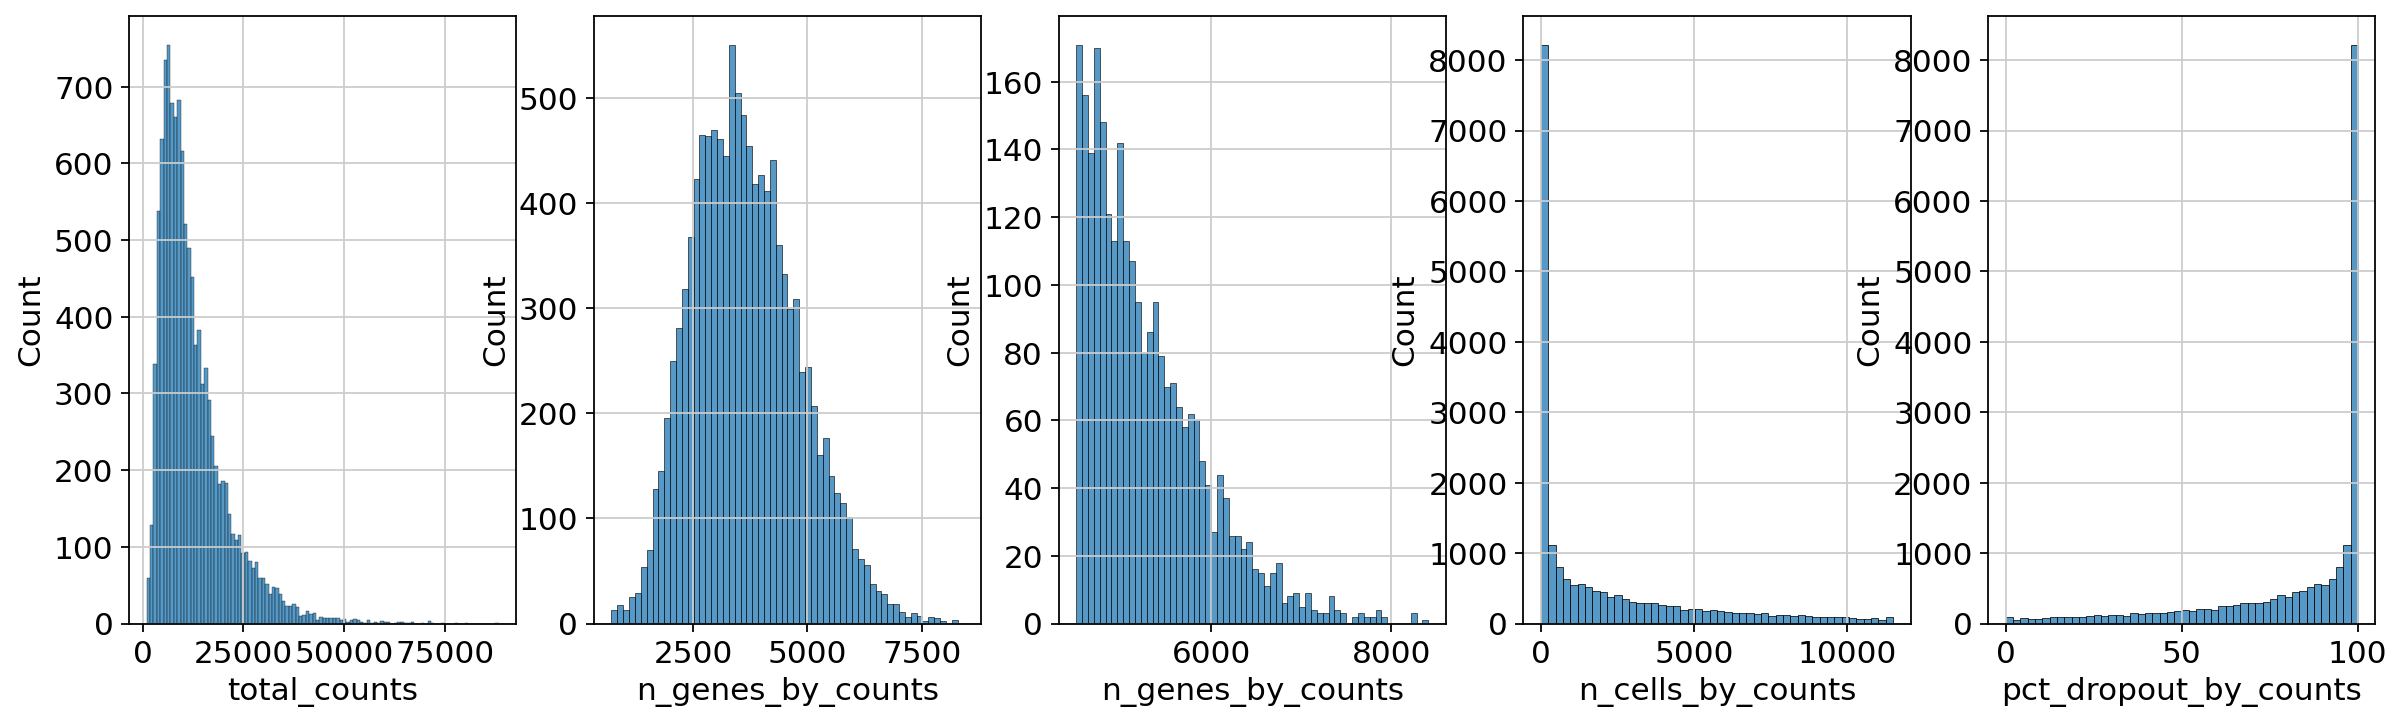

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(18, 5))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"][sub_adata.obs["n_genes_by_counts"] > 4500], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.var["n_cells_by_counts"], kde=False, ax=axs[3])
sns.histplot(adata.var["pct_dropout_by_counts"], kde=False, ax=axs[4])
plt.savefig(os.path.join(output_fig_dir,"inh_counts_dist.png"))


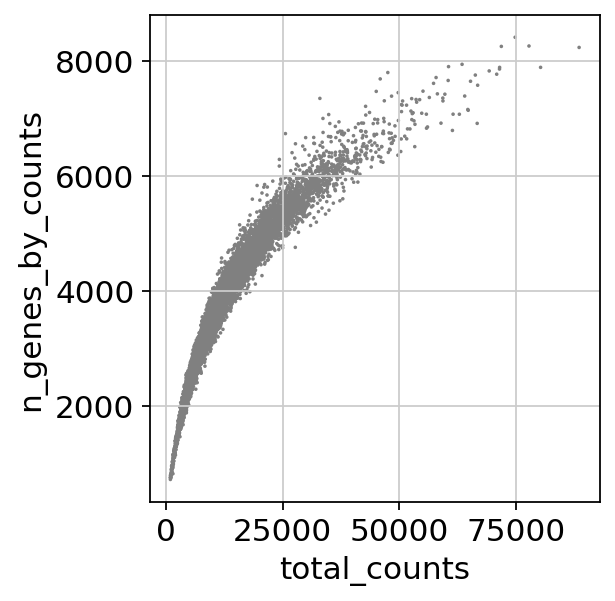

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',show=False)
plt.savefig(os.path.join(output_fig_dir,"inh_genes_by_counts.png"))
#Can color plot based on any variable from obs

In [ ]:
#sc.pp.filter_cells(adata, max_counts=40000)
sc.pp.filter_genes(adata, min_cells=3)
#sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True,save=False)
#plt.savefig(os.path.join(output_fig_dir,"filt_qc.png"))
print(adata)

filtered out 1946 genes that are detected in less than 3 cells
AnnData object with n_obs × n_vars = 11512 × 18049
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors'


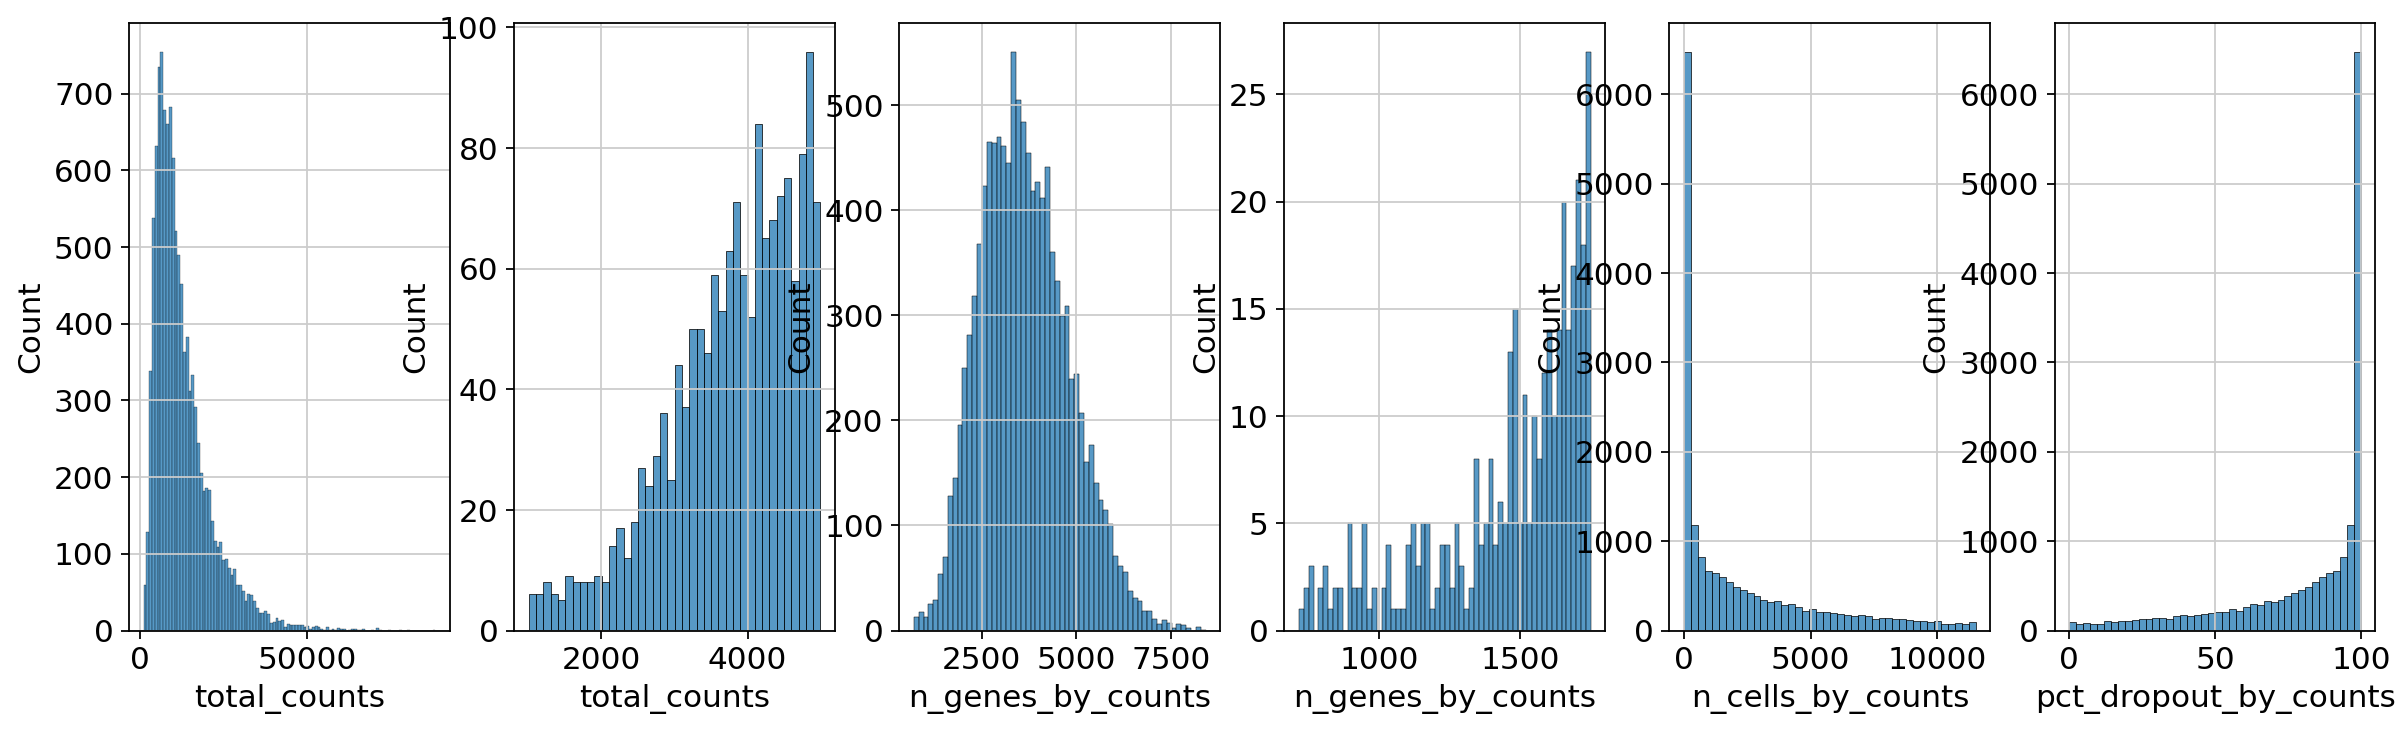

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(18, 5))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 5000], kde=False, bins=40, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 1750], kde=False, bins=60, ax=axs[3])
sns.histplot(adata.var["n_cells_by_counts"], kde=False, ax=axs[4])
sns.histplot(adata.var["pct_dropout_by_counts"], kde=False, ax=axs[5])
plt.savefig(os.path.join(output_fig_dir,"after_filtering_counts_dist.png"))

In [ ]:
adata.write_h5ad(os.path.join(output_data_dir,"inh_raw_filt.h5ad"),compression='gzip')

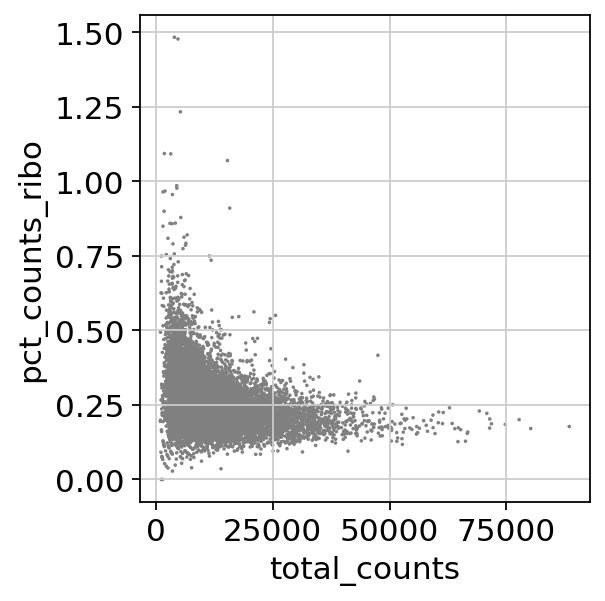

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo',show=False)
plt.savefig(os.path.join(output_fig_dir,"inh_ribo_counts.png"))
#there are cells with zero or very low ribosomal gene expression, should be filtered out or not?

In [ ]:
#normalization
#normalize to 10000 reads, log transformed,
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
2123


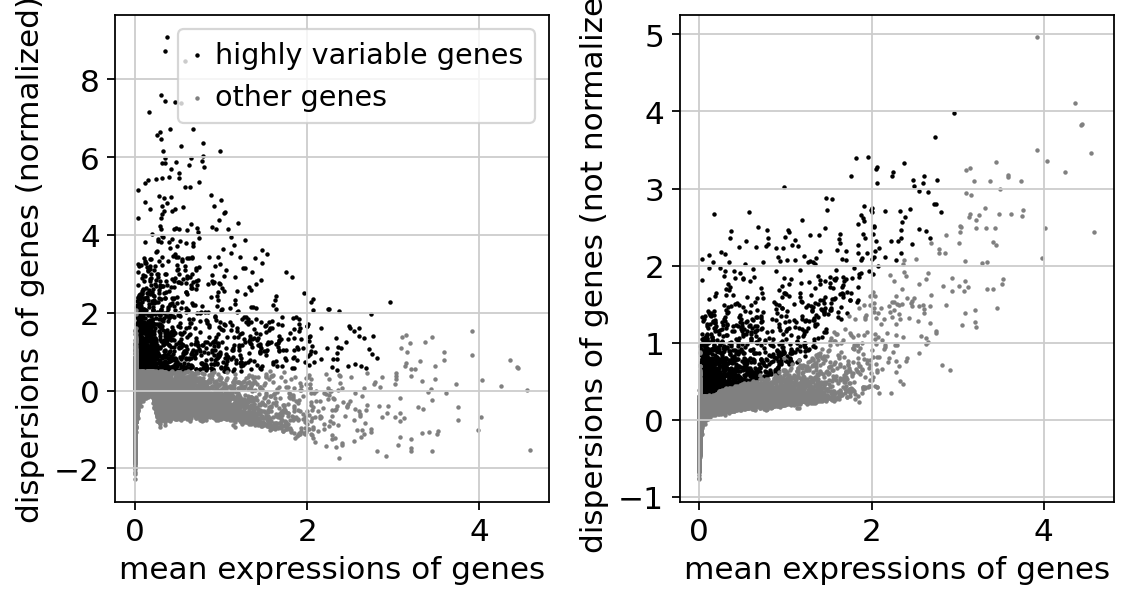

In [ ]:
#Identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.012, max_mean=3, min_disp=0.5, flavor="seurat", batch_key='sample')
sc.pl.highly_variable_genes(adata,show=False)
plt.savefig(os.path.join(output_fig_dir,"glail_highly_variable_genes.png"))
print(len(adata.var_names[adata.var.highly_variable]))

In [ ]:
#save normalized adata
adata.raw = adata

In [ ]:
hvg_df = pd.DataFrame()
hvg_df['gene'] = adata.var_names
hvg_df['hvg'] = adata.var.highly_variable.tolist()
hvg_df.to_csv(os.path.join(output_data_dir,"inh_hvg.txt"),index=False,sep="\t")

In [ ]:
#ribosomal genes in highly variable genes
hvg_gene = adata.var_names[adata.var.highly_variable]
print(hvg_gene[hvg_gene.str.startswith('Rpl')])
print(hvg_gene[hvg_gene.str.startswith('Rps')])

Index(['Rpl18', 'Rpl28', 'Rpl37', 'Rpl22l1', 'Rpl32', 'Rpl11', 'Rpl29',
       'Rpl14', 'Rplp1', 'Rpl23', 'Rpl38-ps9-1', 'Rpl30l2', 'Rpl15', 'Rpl18a',
       'Rpl39'],
      dtype='object')
Index(['Rps19', 'Rps13', 'Rps6ka2', 'Rps23', 'Rps3a', 'Rps27', 'Rps21',
       'Rps7-ps23', 'Rps20-ps10', 'Rps29', 'Rps6ka5', 'Rps7', 'Rps27a',
       'Rps10l1'],
      dtype='object')


In [ ]:
#The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. In that case, the step actually do the filtering below is unnecessary, too.

#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed, and ribosomal gene expressed. Scale the data to unit variance.
adata = adata[:, adata.var.highly_variable]


In [ ]:
print(adata)
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt','pct_counts_ribo'])
#Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

View of AnnData object with n_obs × n_vars = 11512 × 2123
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'sample_colors', 'log1p', 'hvg'
regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']
    sparse input is densified and may lead to high memory use
    finished (0:00:43)


In [ ]:
#remove mt genes, and sex genes before clustering

gene_screenfile="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat/Rat_chrXYMT_gene.txt"
rm_genelist = pd.read_csv(gene_screenfile,sep="\t",header=0)
#rm_genelist.columns = ["gene"]
print(rm_genelist)
filt_gene = adata.var_names[~adata.var.gene_ids.isin(rm_genelist['gene'])]
adata = adata[:,filt_gene]

                    gene
0     ENSRNOG00000000161
1     ENSRNOG00000000164
2     ENSRNOG00000000165
3     ENSRNOG00000000166
4     ENSRNOG00000000167
...                  ...
1418  ENSRNOG00000071143
1419  ENSRNOG00000071176
1420  ENSRNOG00000071183
1421  ENSRNOG00000071186
1422  ENSRNOG00000071206

[1423 rows x 1 columns]


In [ ]:
print(adata)

View of AnnData object with n_obs × n_vars = 11512 × 2020
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [ ]:
adata.write_h5ad(os.path.join(output_data_dir,"inh_norm_hvg.h5ad"),compression='gzip')

In [ ]:
ribo_genes = adata.var_names[adata.var.ribo]
print(ribo_genes)

Index(['Rps19', 'Rpl18', 'Rps13', 'Rps6ka2', 'Rpl28', 'Rps23', 'Rpl37',
       'Rps3a', 'Rps27', 'Rpl22l1', 'Rpl32', 'Rps21', 'Rps7-ps23', 'Rpl11',
       'Rps20-ps10', 'Rps29', 'Rps6ka5', 'Rps7', 'Rpl29', 'Rpl14', 'Rplp1',
       'Rpl23', 'Rpl38-ps9-1', 'Rpl30l2', 'Rps27a', 'Rpl15', 'Rpl18a', 'Rpl39',
       'Rps10l1'],
      dtype='object')


In [ ]:
#remove ribo genes
adata = adata[:, ~adata.var_names.isin(ribo_genes)]

In [ ]:
print(adata)

View of AnnData object with n_obs × n_vars = 11512 × 2020
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg'


computing PCA
    on highly variable genes
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:02)


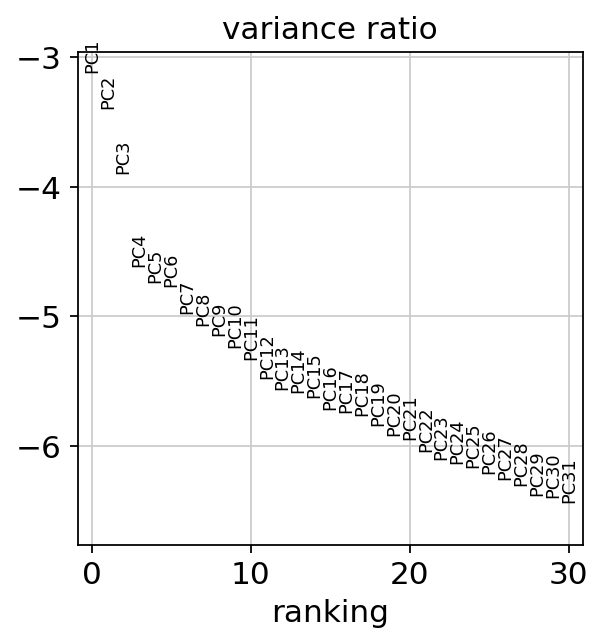

In [ ]:
#Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, log=True,show=False)
plt.savefig(os.path.join(output_fig_dir,"inh_pca_var_ratio.png"))

In [ ]:
#batch correction
sc.external.pp.harmony_integrate(adata, 'sample')
#replcae PCA by the batch corrected data
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)


2024-03-04 06:02:12,754 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-03-04 06:02:18,296 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-03-04 06:02:18,384 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-03-04 06:02:23,705 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-03-04 06:02:28,362 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-03-04 06:02:33,024 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-03-04 06:02:36,540 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-03-04 06:02:38,134 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2024-03-04 06:02:39,744 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2024-03-04 06:02:41,210 - 

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [ ]:
sc.tl.leiden(adata, resolution=0.2)
#calculate paga & plot
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False,show =False,use_raw=True)  # remove `plot=False` if you want to see the coarse-grained graph
#plt.savefig(os.path.join(output_dir,"paga_leiden_cluster.png"))
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color=["sample","leiden"], cmap="tab20",show=False,wspace=0.5)
plt.savefig(os.path.join(output_fig_dir,"inh_Harmony_umap_by_sample.png"))

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="pct_counts_mt", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"inh_hvg_pct_counts_mt.png"),bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="pct_counts_ribo", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"inh_hvg_pct_counts_ribo.png"),bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="doublet_score", groupby="leiden", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"inh_hvg_doublet_score_class.png"),bbox_inches="tight")

In [ ]:
print(adata.obs['leiden'].value_counts())

In [ ]:
del adata.uns['rank_genes_groups']

In [ ]:
##marker genes from the paper

Lamp5 = ["Npy","Lamp5","Lhx6"] #,"Pde11a"]
Meis2 = ["Igfbpl1","Tiam2","Meis2"]
Pvalb = ["Cntnap4","Pvalb"]
Sncg = ["Cnr1","Col25a1"]
Sst_chod = ["Nos1"]
Sst =["Reln","Sst"]
Vip =["Vip"]

marker_genes = Lamp5 + Meis2 + Pvalb + Sncg + Sst + Vip + Sst_chod

Sncg_cls = ["7","9"]
Lamp5_cls = ["3"]
Sst_chod_cls = ["10"]
Vip_cls = ["2","11"]
#Meis2_cls = ["1"]
Pvalb_cls = ["0","5","6"]
Sst_cls = ["1","4","8","13"]

#12 Col5a2, Unc5b new

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


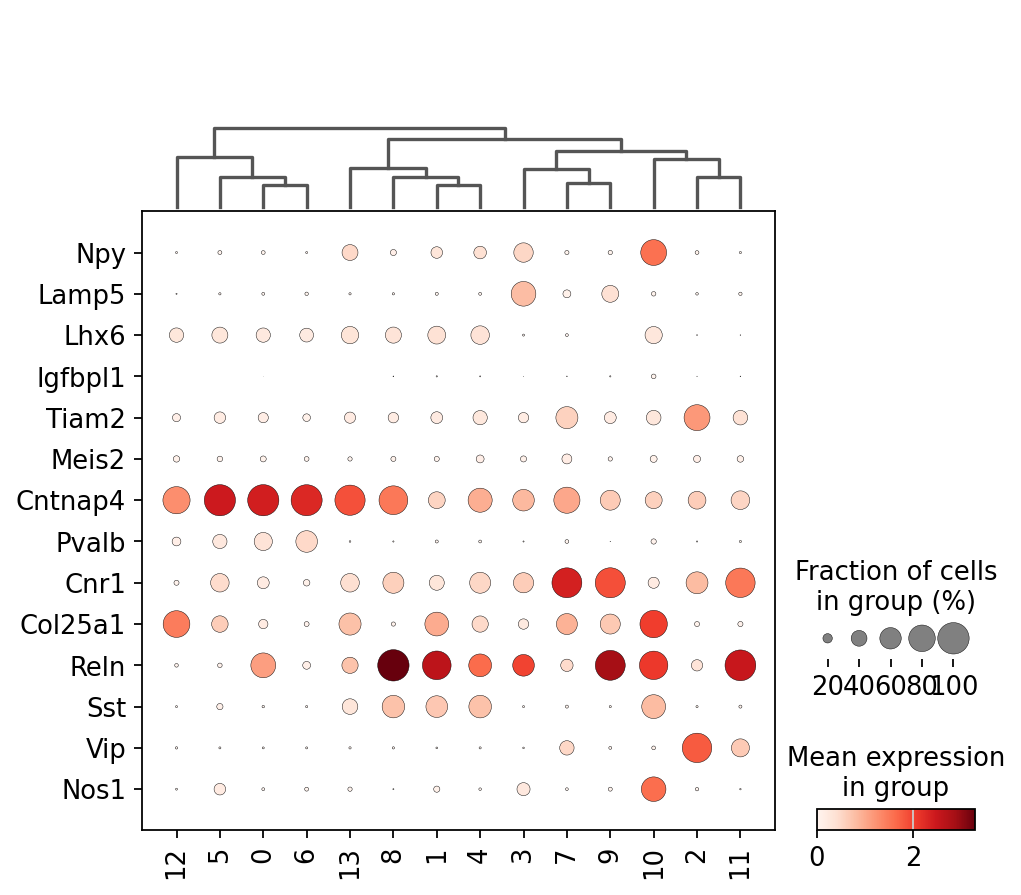

In [ ]:
#del adata.uns['rank_genes_groups']
del adata.uns['dendrogram_leiden']
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True)
plt.savefig(os.path.join(output_fig_dir,"inh_level2_dotplot.png"))

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:26)


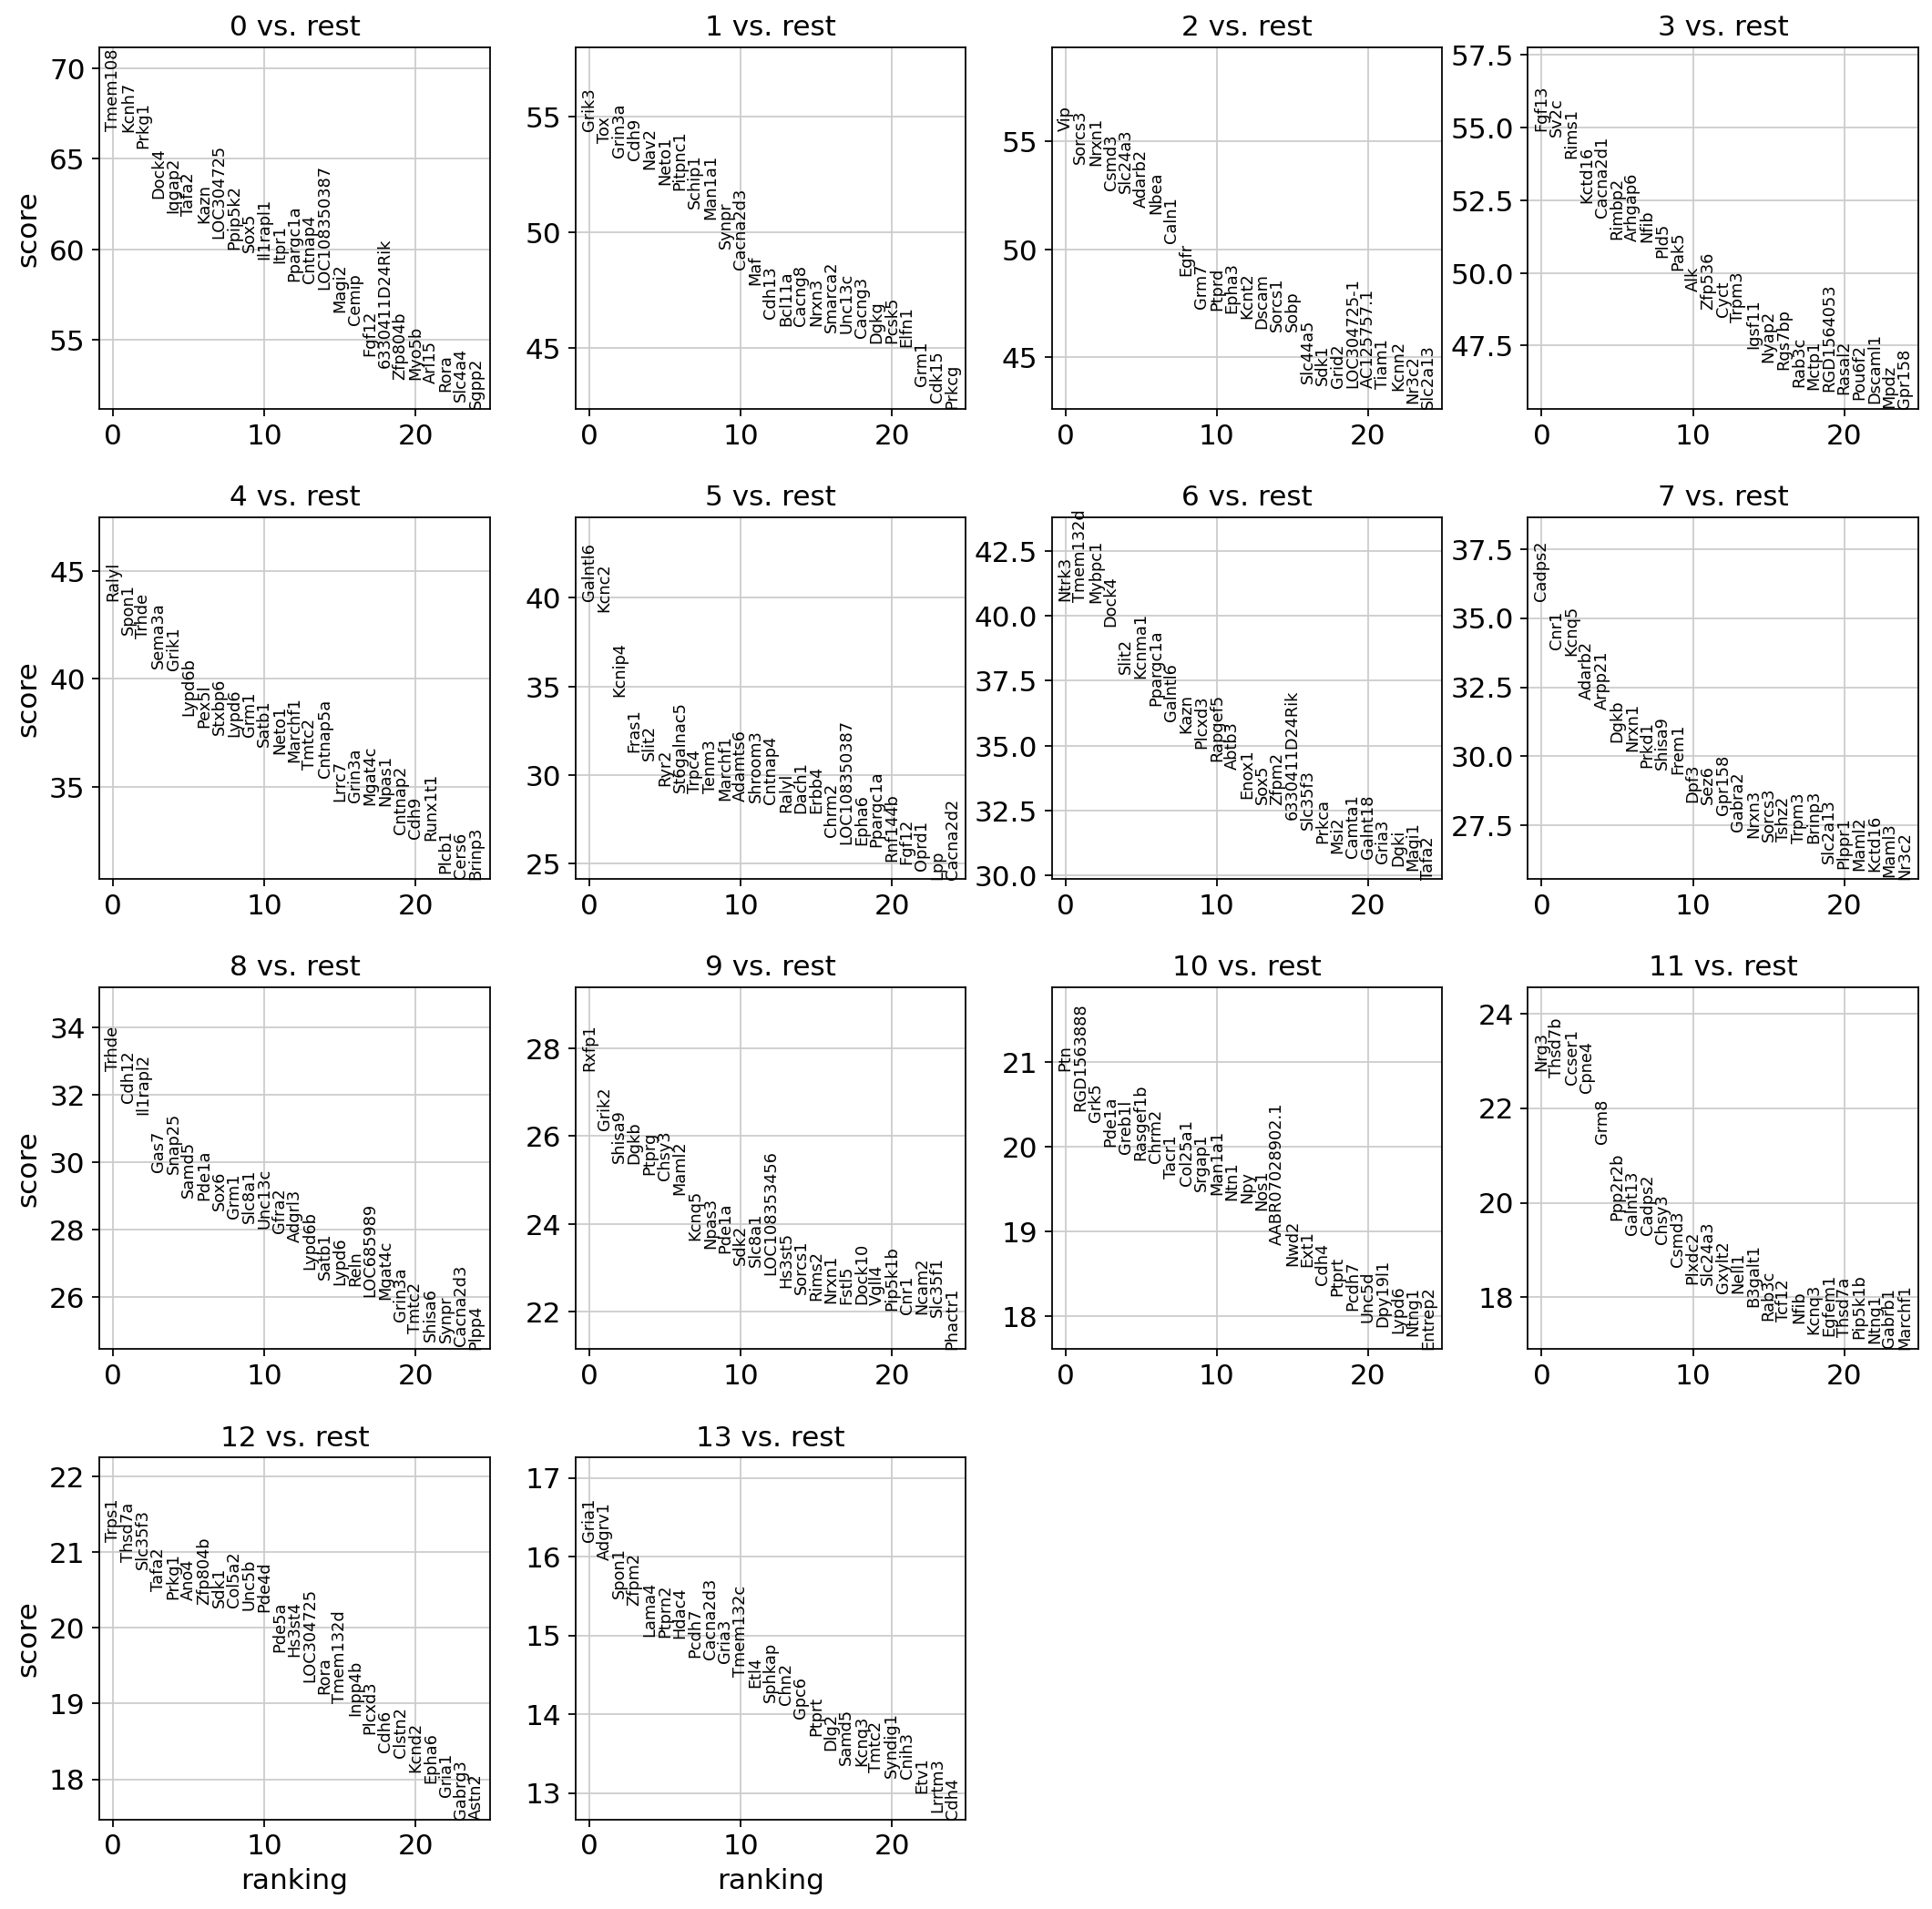

In [ ]:
#Get the most variable genes that define each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=False)
plt.savefig(os.path.join(output_fig_dir,"inh_level2_rank_genes_groups.png"))

In [ ]:
#print(adata)
cls =13
mg = []
for i in range(30):
    mg.append(adata.uns['rank_genes_groups']['names'][i][cls])

print(mg)
marker_genes = marker_genes + mg
#marker_g1 = [g for g in adata.uns['rank_genes_groups']['names'][1]]
#marker_g2 = [g for g in adata.uns['rank_genes_groups']['names'][2]]

['Gria1', 'Adgrv1', 'Spon1', 'Zfpm2', 'Lama4', 'Ptprn2', 'Hdac4', 'Pcdh7', 'Cacna2d3', 'Gria3', 'Tmem132c', 'Etl4', 'Sphkap', 'Chn2', 'Gpc6', 'Ptprt', 'Dlg2', 'Samd5', 'Kcnq3', 'Tmtc2', 'Syndig1', 'Cnih3', 'Etv1', 'Lrrtm3', 'Cdh4', 'Rps6ka2', 'St6galnac5', 'Fut9', 'Kirrel3', 'Sash1']


In [ ]:
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True)

In [ ]:
sncg_smps = adata.obs_names[adata.obs.leiden.isin(Sncg_cls)]
lamp5_smps = adata.obs_names[adata.obs.leiden.isin(Lamp5_cls)]
sst_chod_smps = adata.obs_names[adata.obs.leiden.isin(Sst_chod_cls)]
vip_smps = adata.obs_names[adata.obs.leiden.isin(Vip_cls)]
pvalb_smps = adata.obs_names[adata.obs.leiden.isin(Pvalb_cls)]
sst_smps = adata.obs_names[adata.obs.leiden.isin(Sst_cls)]
unk_smps = adata.obs_names[adata.obs.leiden.isin(["12"])]

In [ ]:
adata.obs['subclass'] = np.empty([adata.n_obs], dtype=str)
for i in sncg_smps:
  adata.obs.loc[i, 'subclass'] = 'Sncg'
for i in lamp5_smps:
  adata.obs.loc[i, 'subclass'] = 'Lamp5'
for i in sst_chod_smps:
  adata.obs.loc[i, 'subclass'] = 'Sst_Chodl'
for i in sst_smps:
  adata.obs.loc[i, 'subclass'] = 'Sst'
for i in vip_smps:
  adata.obs.loc[i, 'subclass'] = 'Vip'
for i in pvalb_smps:
  adata.obs.loc[i, 'subclass'] = 'Pvalb'
for i in unk_smps:
  adata.obs.loc[i, 'subclass'] = 'Noval'

In [ ]:
adata.write_h5ad(os.path.join(output_data_dir,"inh_level2_clustered.h5ad"),compression='gzip')

print(adata)

AnnData object with n_obs × n_vars = 11512 × 2020
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'leiden', 'subclass'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'paga', 'leiden_sizes', 'dendrogram_leiden', 'rank_genes_groups', 'subclass_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


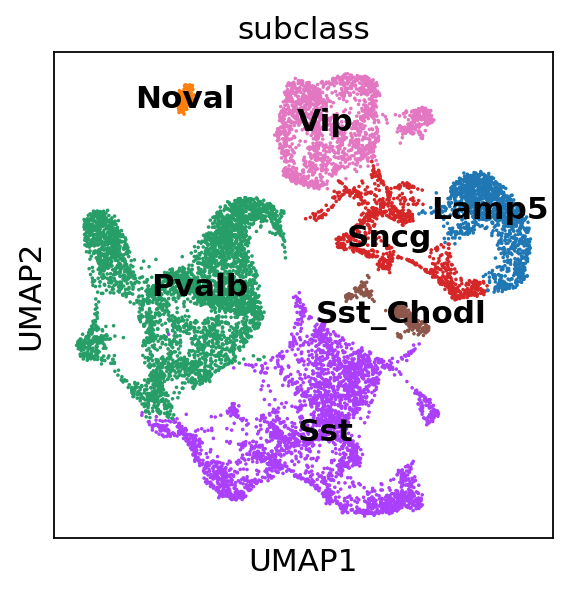

In [ ]:
sc.pl.umap(adata, color=["subclass"], cmap="tab20",show=False,legend_loc="on data")
plt.savefig(os.path.join(output_fig_dir,"inh_subclass.png"))

In [ ]:
sc.tl.leiden(adata, resolution=4)

running Leiden clustering
    finished: found 58 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


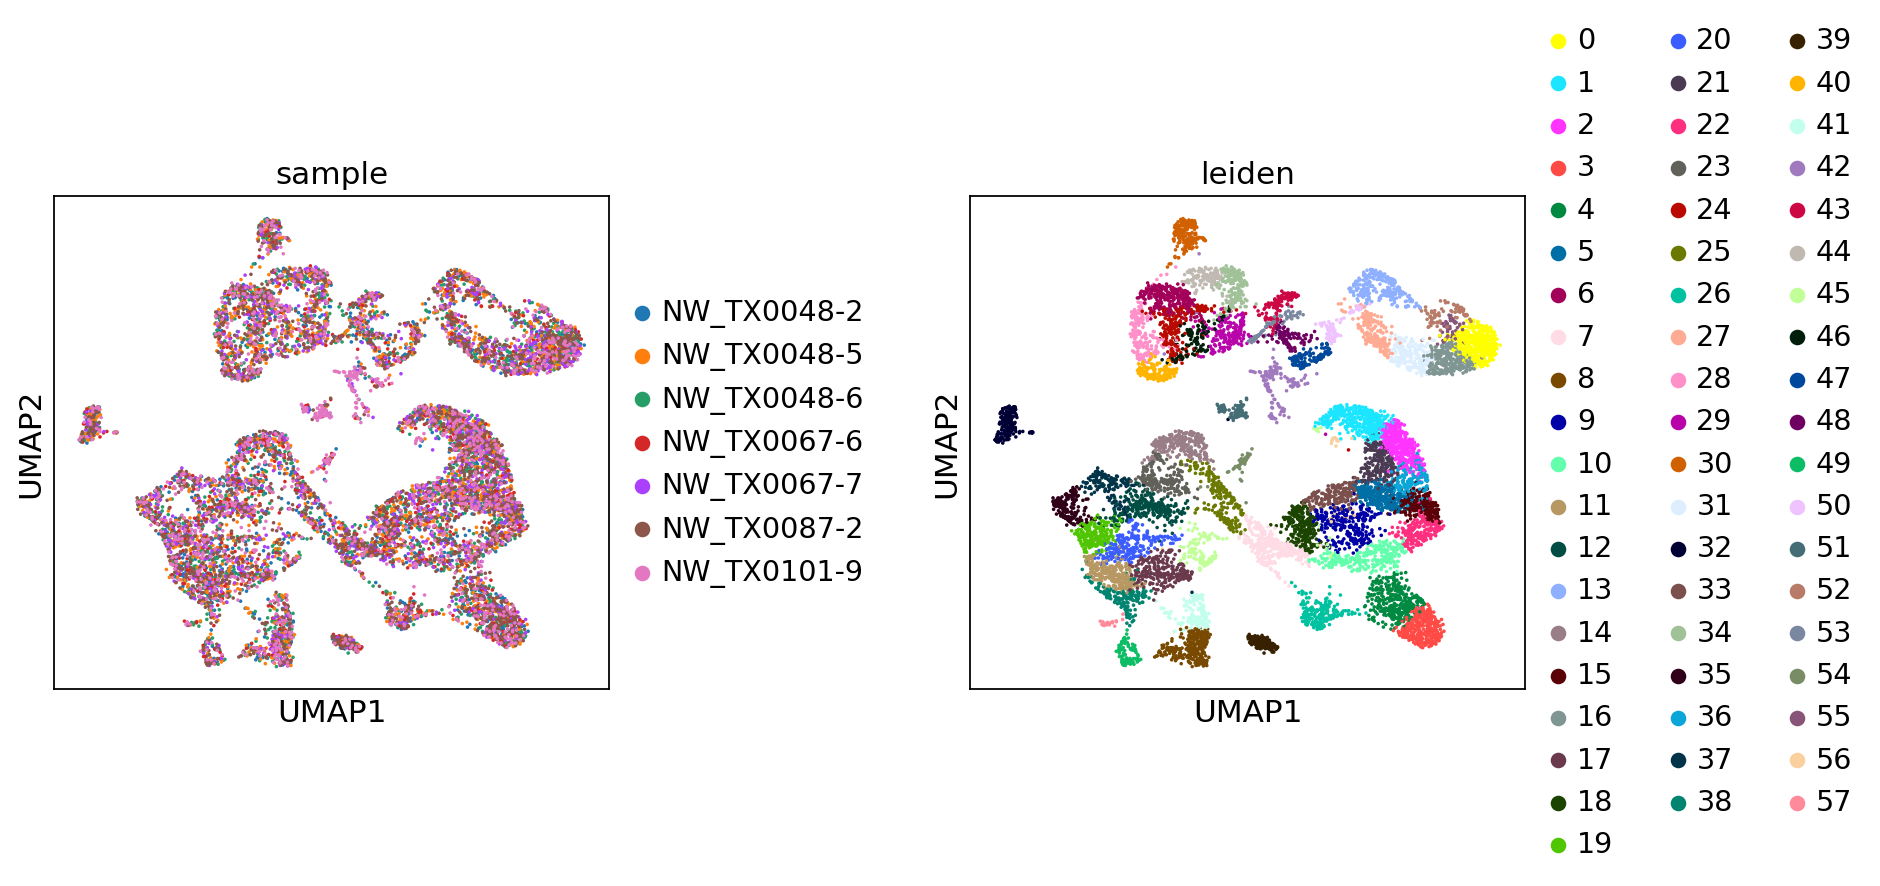

In [ ]:
#calculate paga & plot
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False,show =False,use_raw=True)  # remove `plot=False` if you want to see the coarse-grained graph
#plt.savefig(os.path.join(output_dir,"paga_leiden_cluster.png"))
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color=["sample","leiden"], cmap="tab20",show=False,wspace=0.5)
plt.savefig(os.path.join(output_fig_dir,"inh_Harmony_umap_level3.png"))

In [ ]:
Lamp5 = ["Npy","Lamp5","Lhx6"] #,"Pde11a"]
Meis2 = ["Top2a","Tiam2","Meis2"]
Pvalb = ["Cntnap4","Pvalb"]
Sncg = ["Cnr1","Col25a1"]
Sst_chod = ["Nos1"]
Sst =["Reln","Sst"]
Vip =["Vip"]

marker_genes = Lamp5 + Meis2 + Pvalb + Sncg + Sst + Vip + Sst_chod
sst_chrod = ["32"]
marker_genes.append("Ndnf")
marker_genes.append("Chrna7")
#marker_genes.append("Pde11a")
marker_genes.append("Rbp4")

lamp5_1 = ["0"]
lamp5_2 = ["16"]
lamp5_3 = ["55"]
lamp5_4 = ["31"]
lamp5_5 = ["27"]
lamp5_6 = ["52"]
lamp5_7 = ["13"]

marker_genes.append("Ndnf")
marker_genes.append("Chrna7")
#marker_genes.append("Pde11a")
marker_genes.append("Vipr2")

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


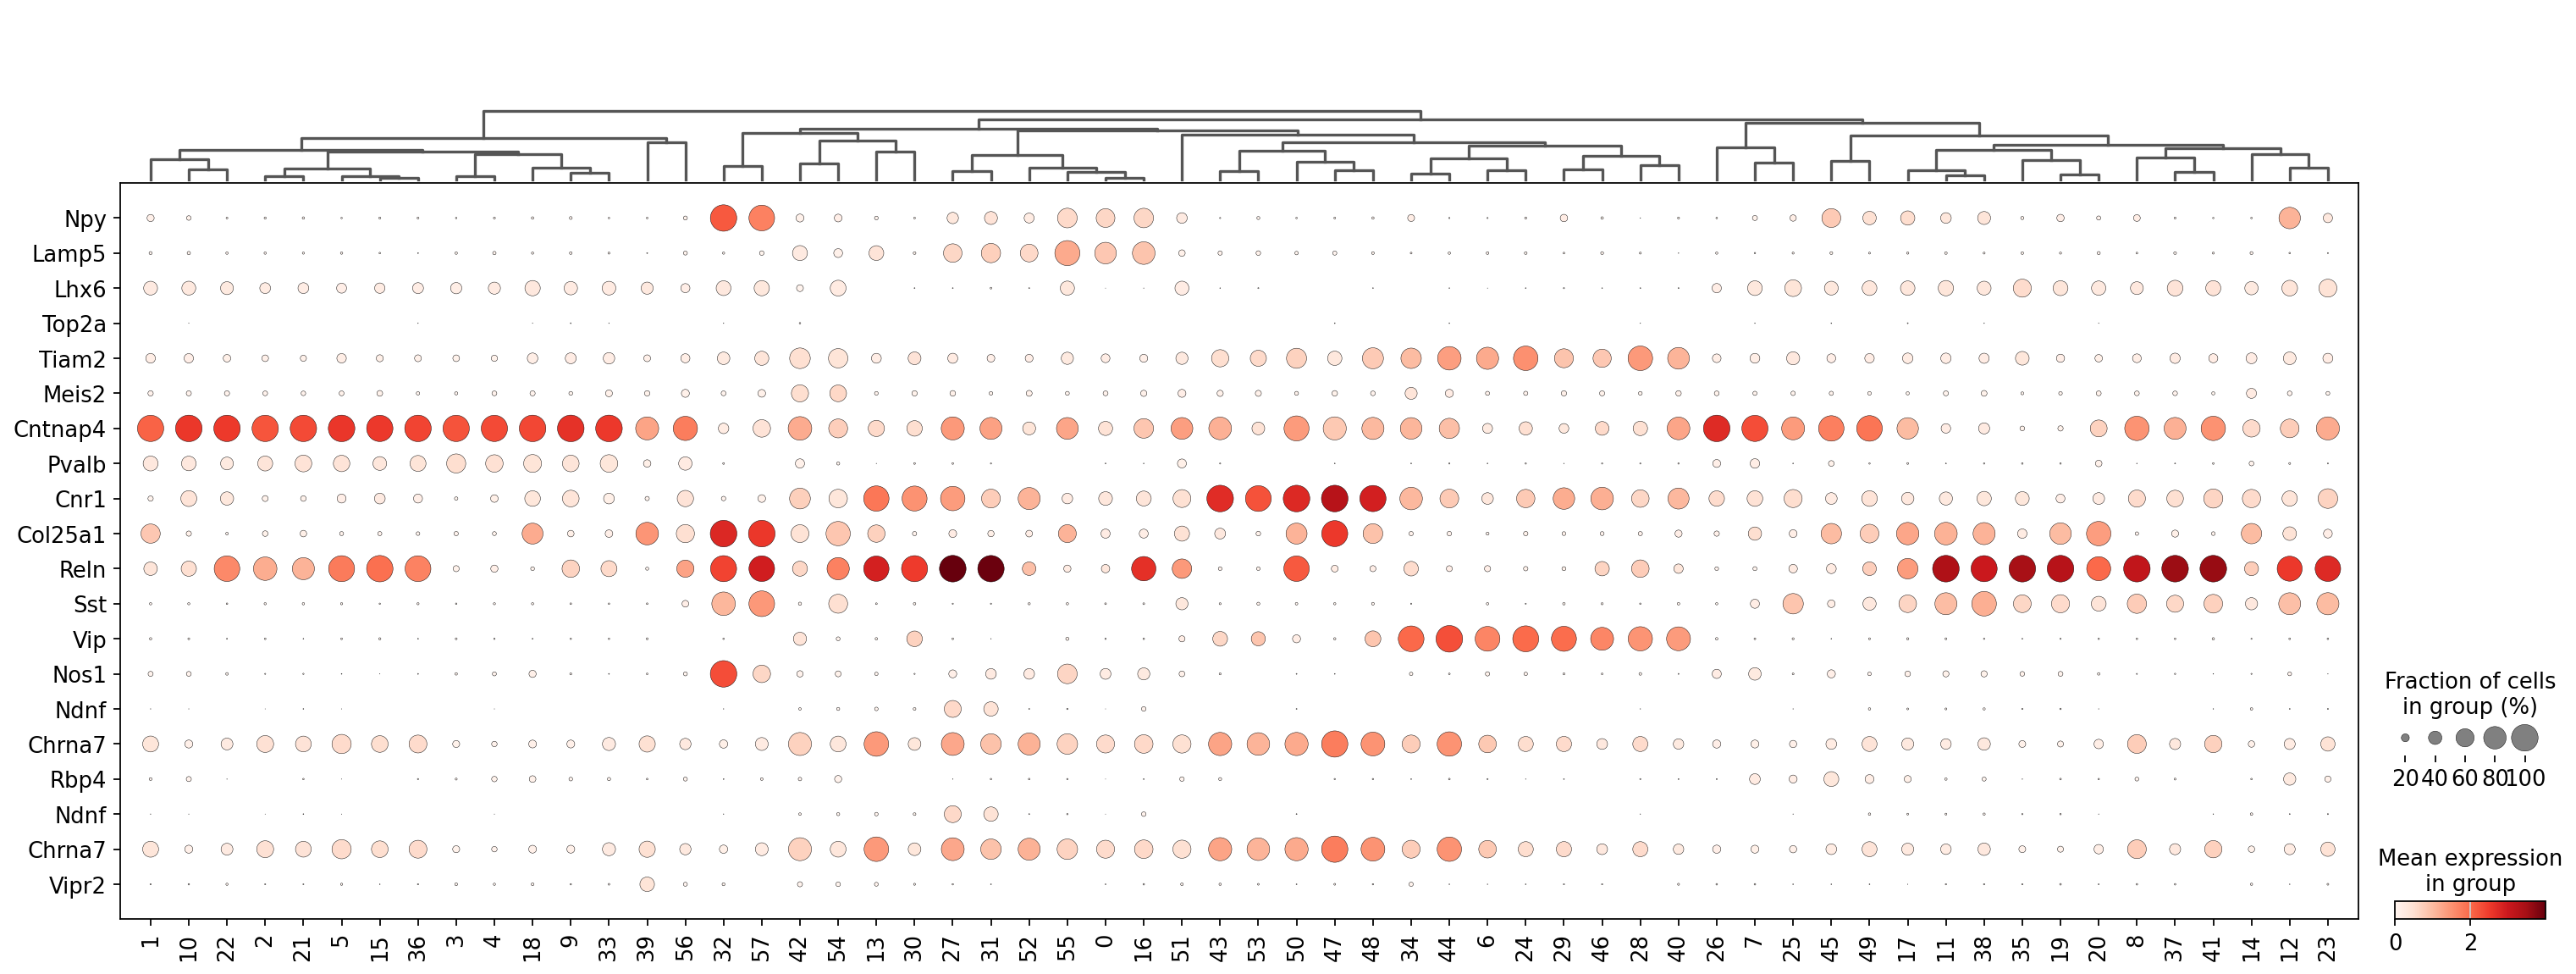

In [ ]:
#del adata.uns['dendrogram_leiden']
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True)
plt.savefig(os.path.join(output_fig_dir,"inh_level3_dotplot.png"))

In [ ]:
pvalb_1 = ["1"]; sst_1 = ["17"]; sst_2 = ["11"]; sst_3 = ["38"]; sst_4 = ["35"]; sst_5 = ["19"];
pvalb_2 = ["10"]; sst_6 = ["20"];sst_7 = ["8"]; sst_8 = ["37"] ; sst_9 = ["41"]; sst_10 = ["14"];
pvalb_3 = ["22"]; sst_11 = ["12"]; sst_15 = ["23"]; sst_16 = ["54"]; sst_17 = ["49"]; sst_18 = ["57"];
pvalb_4 = ["2"]; sncg_1 = ["50"]; sncg_2 = ["47"]; sncg_3 = ["48"]; sncg_4 = ["43"]; sncg_5 = ["53"];
pvalb_5 = ["21"]; meis2 = ["42"];
pvalb_6 = ["5"]; vip_1 = ["40"]; vip_2 = ["28"]; vip_3 = ["46"]; vip_4 = ["29"]; vip_5 = ["24"];
pvalb_7 = ["15"] ; vip_6 = ["6"]; vip_7 =["44"]; vip_8 = ["34"]; vip_9 = ["30"];
pvalb_8 = ["36","56"];  sst_chod = ["32"]; sst_pvalb_1 = ["45"]; sst_pvalb_2 = ["25"];
pvalb_9 = ["3"]; pvalb_14 = ["7"]; pvalb_15 = ["26"];
pvalb_10 = ["4"]; noval = ["51"]
pvalb_11 = ["18"]
pvalb_12 = ["9"]
pvalb_13 = ["33"]
chc = ["39"]

In [ ]:
flist = pvalb_1 + pvalb_2 + pvalb_3 + pvalb_4 + pvalb_5 + pvalb_6 + pvalb_7 + pvalb_8 + pvalb_9 + pvalb_10 + pvalb_11 + pvalb_12 + pvalb_13 + chc + pvalb_14 + pvalb_15
flist = flist + sncg_1 + sncg_2 + sncg_3 + sncg_4 + sncg_5 + meis2 + vip_1 + vip_2 + vip_3 + vip_4 + vip_5 + vip_6 + vip_7 + vip_8 + vip_9
flist = flist + sst_1 + sst_2 + sst_3 + sst_4 + sst_5 + sst_6 + sst_7 + sst_8 + sst_9 + sst_10 + sst_11 + sst_15 + sst_16 + sst_17 + sst_18 + sst_chod
flist = flist + lamp5_1 + lamp5_2 + lamp5_3 + lamp5_4 + lamp5_5 + lamp5_6 + lamp5_7 + sst_pvalb_1 + sst_pvalb_2 + noval
print(np.unique(flist))
print(len(flist))

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '6' '7' '8' '9']
58


In [ ]:
adata = adata[~adata.obs.leiden.isna(),:]

In [ ]:
print(adata)

View of AnnData object with n_obs × n_vars = 11512 × 2020
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'leiden', 'cluster_label', 'subclass'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'paga', 'leiden_sizes', 'rank_genes_groups', 'subclass_colors', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [ ]:
print(adata.obs.subclass.value_counts())

Pvalb        4212
Sst          3126
Vip          1657
Lamp5        1464
Sncg          491
Sst_Chodl     183
Chc           159
Meis2         135
Noval          85
               51
Name: subclass, dtype: int64


In [ ]:
del adata.uns['dendrogram_leiden']
del adata.uns['sample_colors']
del adata.uns['subclass_colors']


In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs_by_cluster = pd.DataFrame({group + '_' + key[:14]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'pvals_adj']})
degs_by_cluster.to_csv("inh_DEG_adata_cell_types_pct_to_sort.csv")
pts=pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])
pts.to_csv("inh_pts_adata.csv")

In [ ]:
del adata.uns['rank_genes_groups']

In [ ]:
del adata.obsm['X_umap']

In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 11512 × 2020
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'leiden', 'cluster_label', 'subclass'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [ ]:
del adata.raw

In [ ]:
del adata.obs['subclass']
del adata.obs['cluster_label']

In [ ]:
adata.obs['cluster_label'] = np.empty([adata.n_obs], dtype=str)
#del adata.obs['subclass']
adata.obs['subclass'] = np.empty([adata.n_obs], dtype=str)
pvalb_list = pvalb_1 + pvalb_2 + pvalb_3 + pvalb_4 + pvalb_5 + pvalb_6 + pvalb_7  + pvalb_9 + pvalb_10 + pvalb_11 + pvalb_12 + pvalb_13 + pvalb_14 + pvalb_15
print(len(pvalb_list))
for idx,i in enumerate(pvalb_list):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Pvalb_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Pvalb'
adata.obs.loc[adata.obs.leiden ==  pvalb_8[0], 'cluster_label'] = 'Pvalb_15'
adata.obs.loc[adata.obs.leiden ==  pvalb_8[0], 'subclass'] = 'Pvalb'
adata.obs.loc[adata.obs.leiden ==  pvalb_8[1], 'cluster_label'] = 'Pvalb_15'
adata.obs.loc[adata.obs.leiden ==  pvalb_8[1], 'subclass'] = 'Pvalb'

lamp5_list = lamp5_1 + lamp5_2 + lamp5_3 + lamp5_4 + lamp5_5 + lamp5_6 + lamp5_7
print(len(lamp5_list))
for idx,i in enumerate(lamp5_list):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Lamp5_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Lamp5'
sst_list = sst_1 + sst_2 + sst_3 + sst_4 + sst_5 + sst_6 + sst_7 + sst_8 + sst_9 + sst_10 + sst_11 + sst_15 + sst_16 + sst_17 + sst_18
print(len(sst_list))
for idx,i in enumerate(sst_list):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Sst_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Sst'
sncg_list = sncg_1 + sncg_2 + sncg_3 + sncg_4 + sncg_5
print(len(sncg_list))
for idx,i in enumerate(sncg_list):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Sncg_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Sncg'
meis2_list = meis2
for idx,i in enumerate(meis2_list):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Meis2'
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Meis2'
vip_list = vip_1 + vip_2 + vip_3 + vip_4 + vip_5 + vip_6 + vip_7 + vip_8 + vip_9
print(len(vip_list))
for idx,i in enumerate(vip_list):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Vip_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Vip'

adata.obs.loc[adata.obs.leiden == chc[0], 'cluster_label'] = 'Chc'
adata.obs.loc[adata.obs.leiden == chc[0], 'subclass'] = 'Chc'
adata.obs.loc[adata.obs.leiden == noval[0], 'cluster_label'] = 'Noval'
adata.obs.loc[adata.obs.leiden == noval[0], 'subclass'] = 'Noval'
adata.obs.loc[adata.obs.leiden == sst_chod[0], 'cluster_label'] = 'Sst_Chodl'
adata.obs.loc[adata.obs.leiden == sst_chod[0], 'subclass'] = 'Sst_Chodl'
adata.obs.loc[adata.obs.leiden == sst_pvalb_1[0], 'cluster_label'] = 'Sst_Pvalb_1'
adata.obs.loc[adata.obs.leiden == sst_pvalb_1[0], 'subclass'] = 'Sst'
adata.obs.loc[adata.obs.leiden == sst_pvalb_2[0], 'cluster_label'] = 'Sst_Pvalb_2'
adata.obs.loc[adata.obs.leiden == sst_pvalb_2[0], 'subclass'] = 'Sst'

#print(len(adata.obs.cluster_label.unique()))
print(adata.obs.leiden.unique())

14
7
15
5
9
['11', '32', '38', '10', '29', ..., '42', '56', '55', '54', '57']
Length: 58
Categories (58, object): ['0', '1', '2', '3', ..., '54', '55', '56', '57']


In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 11512 × 2020
    obs: 'doublet_score', 'predicted_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'leiden', 'cluster_label', 'subclass'
    var: 'gene_ids', 'feature_types', 'genome', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [ ]:
adata_cpy = ad.AnnData(X =adata.X ,var=adata.var)
adata_cpy.obs_names = adata.obs_names
adata_cpy.obs['sample'] = adata.obs['sample']
adata_cpy.obs['leiden'] = adata.obs['leiden']
adata_cpy.obs['cluster_label'] = adata.obs['cluster_label']
adata_cpy.obs['subclass'] = adata.obs['subclass']

In [ ]:
adata_cpy.write_h5ad(os.path.join(output_data_dir,"inh_level2_level3_cluster.h5ad"),compression='gzip')

In [ ]:
sc.tl.umap(adata, init_pos='paga')

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


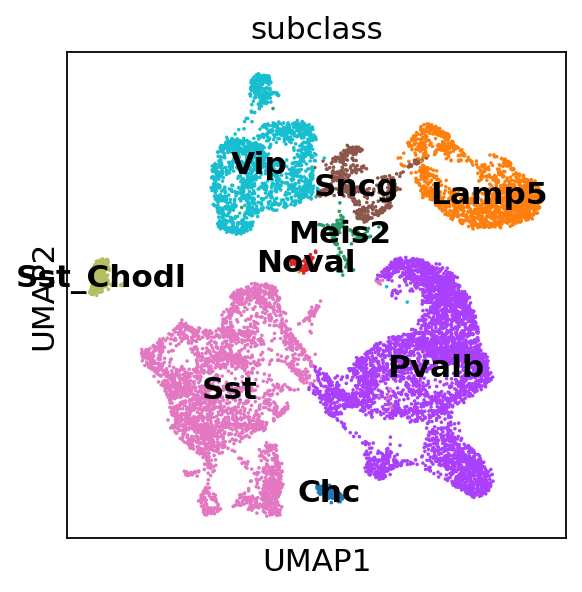

In [ ]:
sc.pl.umap(adata, color=["subclass"], cmap="tab20",show=False,wspace=0.5, legend_loc="on data")
plt.savefig(os.path.join(output_fig_dir,"inh_level2_umap_v2.png"))

#plt.savefig(os.path.join(output_fig_dir,"inh_level2_umap.png"))
#plt.savefig(os.path.join(output_fig_dir,"inh_level2_umap.png"))

In [ ]:
!pip install adjustText
from adjustText import adjust_text

def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


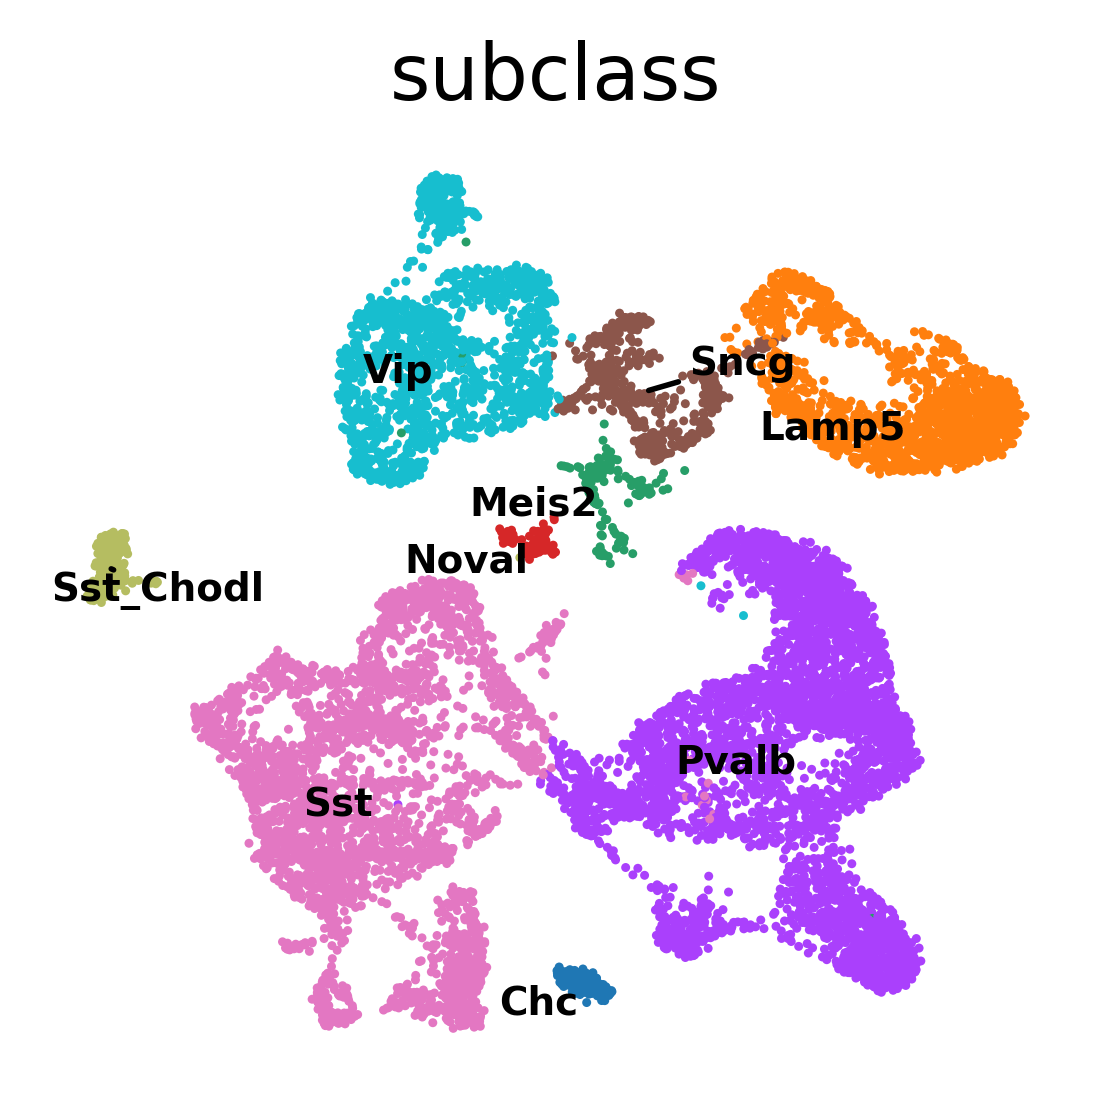

In [ ]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": 200, "figure.frameon": False}):
    ax = sc.pl.umap(adata, color="subclass", show=False, legend_loc=None, frameon=False)
    gen_mpl_labels(
        adata,
        "subclass",
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=7,fontweight='bold'),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(output_fig_dir,"inh_subclass_umap_v2.png"))